<center><b><h1>Final Summative Assessment</h1></b></center>
<center><h3>Machine Learning</h3></center>


Due to global warming, several countries around the world and more specifically within sub-saharan Africa are beginning to experience more frequent and more intense climate extremes. 

One of these extremes is the occurence of flooding in several locations all across Africa. With this notebook, we aim to implement an AI solution that can help mitigate this problem for contries across the continent. 

## Acknowledgements

This project is a result of a summative assignment administered by the African Leadership University Artificial inteligence class. 
![ALUlogo](images/ALUlogo.png)

## Problem Statement

In recent decades, countries across Africa have experienced an increase in the frequency and severity of floods due to global warming. Therefore, the objective is to build a model that leverages machine learning and artificial intelligence in  predicting the location and extent of floods. 

This model will help anticipate potential flood hot spots and allow adequate measures to be prepared in advance. 

## Case Study

For the initial implementation, we will be working with flood data from Malawi. Specifically data related to the flooding incidents in Malawi (2015 & 2019). The idea is to train a model based on flood data from 2015 in Malawi and use that model to accurately predict the flood extent accross different location in 2019. 

In this case Flood data from 2015 will serve as the training set while flood data from 2019 will serve as the testing set and the goal is to get a model good enough to then forecast future flooding in the region. 

This dataset has been obtained from [UNICEF](https://www.unicef.org/), through [Zindi](https://zindi.africa/)

## Importing required libraries

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir

ERROR: Operation cancelled by user


In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

## Data Ingestion

For this segment, we download the data provided by Zindi about the flood in Malawi. The dataset contains a broken up map of southern Malawi (Flood location).

In [2]:
train_dataframe = pd.read_csv("Train.csv")
test_dataframe = pd.read_csv("Train.csv") 
train_dataframe.head(2)

,X,Y,target_2015,elevation,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,...,precip 2019-03-24 - 2019-03-31,precip 2019-03-31 - 2019-04-07,precip 2019-04-07 - 2019-04-14,precip 2019-04-14 - 2019-04-21,precip 2019-04-21 - 2019-04-28,precip 2019-04-28 - 2019-05-05,precip 2019-05-05 - 2019-05-12,precip 2019-05-12 - 2019-05-19,LC_Type1_mode,Square_ID
0,34.26,-15.91,0.0,887.764222,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3896-14ce-11ea-bce5-f49634744a41
1,34.26,-15.90,0.0,743.403912,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3897-14ce-11ea-bce5-f49634744a41


## Exploratory Data analysis

In [3]:
# Check for Null values
train_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16466 entries, 0 to 16465
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   X                               16466 non-null  float64
 1   Y                               16466 non-null  float64
 2   target_2015                     16466 non-null  float64
 3   elevation                       16466 non-null  float64
 4   precip 2014-11-16 - 2014-11-23  16466 non-null  float64
 5   precip 2014-11-23 - 2014-11-30  16466 non-null  float64
 6   precip 2014-11-30 - 2014-12-07  16466 non-null  float64
 7   precip 2014-12-07 - 2014-12-14  16466 non-null  float64
 8   precip 2014-12-14 - 2014-12-21  16466 non-null  float64
 9   precip 2014-12-21 - 2014-12-28  16466 non-null  float64
 10  precip 2014-12-28 - 2015-01-04  16466 non-null  float64
 11  precip 2015-01-04 - 2015-01-11  16466 non-null  float64
 12  precip 2015-01-11 - 2015-01-18  

In [4]:
# Get list of columns in the dataframe
train_dataframe.columns

Index(['X', 'Y', 'target_2015', 'elevation', 'precip 2014-11-16 - 2014-11-23',
       'precip 2014-11-23 - 2014-11-30', 'precip 2014-11-30 - 2014-12-07',
       'precip 2014-12-07 - 2014-12-14', 'precip 2014-12-14 - 2014-12-21',
       'precip 2014-12-21 - 2014-12-28', 'precip 2014-12-28 - 2015-01-04',
       'precip 2015-01-04 - 2015-01-11', 'precip 2015-01-11 - 2015-01-18',
       'precip 2015-01-18 - 2015-01-25', 'precip 2015-01-25 - 2015-02-01',
       'precip 2015-02-01 - 2015-02-08', 'precip 2015-02-08 - 2015-02-15',
       'precip 2015-02-15 - 2015-02-22', 'precip 2015-02-22 - 2015-03-01',
       'precip 2015-03-01 - 2015-03-08', 'precip 2015-03-08 - 2015-03-15',
       'precip 2019-01-20 - 2019-01-27', 'precip 2019-01-27 - 2019-02-03',
       'precip 2019-02-03 - 2019-02-10', 'precip 2019-02-10 - 2019-02-17',
       'precip 2019-02-17 - 2019-02-24', 'precip 2019-02-24 - 2019-03-03',
       'precip 2019-03-03 - 2019-03-10', 'precip 2019-03-10 - 2019-03-17',
       'precip 2019-0

As we can see above, we have listed all the columns present in the dataset obtained from [Zindi](https://zindi.africa/). 

- X, Y : This represents the coordinates of a piece of land to be evaluated for flooding


- target_2015: The target is the percentage of the given rectangle that was flooded in 2015, with a value between 0 and 1.


- Elevation: Represents the mean elevation of the specific land (based on the provided X, Y coordinates).


- Precip: This is weekly percipitation data for 18 weeks, beginning 2 months before the flooding in both 2015 and 2019 respectively. 


- LC_Type1_mode: This refers to the dominant land cover type in a specific land X, Y coordinate. 

## Build training Data

For the training, we want to extract the following features:
- Elevation
- Land Type
- Percipitation data for the 8 weeks before the flooding occured i.e 2014-11-16 - 2015-01-11

**Note:** Flooding occured on the 15th of January, 2015 so that data is not included in the training. 

In [5]:
# Remove the data from 2019 i.e testing data.
for y in ["X", "Y","precip 2014-11-16 - 2014-11-23", "precip 2019-01-20 - 2019-01-27", "precip 2019-01-27 - 2019-02-03", 
          "precip 2019-02-03 - 2019-02-10", "precip 2019-02-10 - 2019-02-17", "precip 2019-02-17 - 2019-02-24",
          "precip 2019-02-24 - 2019-03-03", "precip 2019-03-03 - 2019-03-10", "precip 2019-03-10 - 2019-03-17",
          "precip 2019-03-17 - 2019-03-24", "precip 2019-03-24 - 2019-03-31", "precip 2019-03-31 - 2019-04-07", 
          "precip 2019-04-07 - 2019-04-14", "precip 2019-04-14 - 2019-04-21", "precip 2019-04-21 - 2019-04-28", 
          "precip 2019-04-28 - 2019-05-05", "precip 2019-05-05 - 2019-05-12", "precip 2019-05-12 - 2019-05-19", "Square_ID"]:
    train_dataframe = train_dataframe.drop(y, axis=1)
    
    

In [6]:
# Create new dataframe for the training data label
train_label = pd.DataFrame()
train_label["target_2015"] = train_dataframe["target_2015"].values

In [7]:
train_dataframe = train_dataframe.drop("target_2015", axis=1)
train_dataframe.count()

elevation                         16466
precip 2014-11-23 - 2014-11-30    16466
precip 2014-11-30 - 2014-12-07    16466
precip 2014-12-07 - 2014-12-14    16466
precip 2014-12-14 - 2014-12-21    16466
precip 2014-12-21 - 2014-12-28    16466
precip 2014-12-28 - 2015-01-04    16466
precip 2015-01-04 - 2015-01-11    16466
precip 2015-01-11 - 2015-01-18    16466
precip 2015-01-18 - 2015-01-25    16466
precip 2015-01-25 - 2015-02-01    16466
precip 2015-02-01 - 2015-02-08    16466
precip 2015-02-08 - 2015-02-15    16466
precip 2015-02-15 - 2015-02-22    16466
precip 2015-02-22 - 2015-03-01    16466
precip 2015-03-01 - 2015-03-08    16466
precip 2015-03-08 - 2015-03-15    16466
LC_Type1_mode                     16466
dtype: int64

In [8]:
# Now Drop data from after the flooding
for y in ["precip 2015-01-11 - 2015-01-18", "precip 2015-01-18 - 2015-01-25", "precip 2015-01-25 - 2015-02-01", 
          "precip 2015-02-01 - 2015-02-08", "precip 2015-02-08 - 2015-02-15", "precip 2015-02-15 - 2015-02-22", 
          "precip 2015-02-22 - 2015-03-01", "precip 2015-03-01 - 2015-03-08", "precip 2015-03-08 - 2015-03-15"]:
    train_dataframe = train_dataframe.drop(y, axis=1)
    
    

In [9]:
train_dataframe.head()

,elevation,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,precip 2014-12-28 - 2015-01-04,precip 2015-01-04 - 2015-01-11,LC_Type1_mode
0,887.764222,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,9
1,743.403912,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,9
2,565.728343,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,9
3,443.392774,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,10
4,437.443428,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,10


Now we have our training dataframe with 8 weeks of percipitation data leading up to the flooding as well as land elevation and land type. These are the features that we will be using to develop our model.

## Build testing Data

For the testing dataset, we want to extract the following features:
- Elevation
- Land Type
- Percipitation data for the 8 weeks before the flooding occured i.e 2019-01-27 - 2019-03-10

**Note:** Flooding occured on the 14th of March, 2019 so that data is not included in the testing. 

In [10]:
# Remove the data from 2015 i.e Trainig data.
for x in ["X", "Y", "precip 2014-11-16 - 2014-11-23", "precip 2014-11-23 - 2014-11-30", "precip 2014-11-30 - 2014-12-07",
          "precip 2014-12-07 - 2014-12-14", "precip 2014-12-14 - 2014-12-21", "precip 2014-12-21 - 2014-12-28", 
          "precip 2014-12-28 - 2015-01-04", "precip 2015-01-04 - 2015-01-11", "precip 2015-01-11 - 2015-01-18",
          "precip 2015-01-18 - 2015-01-25", "precip 2015-01-25 - 2015-02-01", "precip 2015-02-01 - 2015-02-08",
          "precip 2015-02-08 - 2015-02-15", "precip 2015-02-15 - 2015-02-22", "precip 2015-02-22 - 2015-03-01",
          "precip 2015-03-01 - 2015-03-08", "precip 2015-03-08 - 2015-03-15", "Square_ID", "target_2015"]:
    test_dataframe = test_dataframe.drop(x, axis=1)


In [11]:
test_dataframe.count()

elevation                         16466
precip 2019-01-20 - 2019-01-27    16466
precip 2019-01-27 - 2019-02-03    16466
precip 2019-02-03 - 2019-02-10    16466
precip 2019-02-10 - 2019-02-17    16466
precip 2019-02-17 - 2019-02-24    16466
precip 2019-02-24 - 2019-03-03    16466
precip 2019-03-03 - 2019-03-10    16466
precip 2019-03-10 - 2019-03-17    16466
precip 2019-03-17 - 2019-03-24    16466
precip 2019-03-24 - 2019-03-31    16466
precip 2019-03-31 - 2019-04-07    16466
precip 2019-04-07 - 2019-04-14    16466
precip 2019-04-14 - 2019-04-21    16466
precip 2019-04-21 - 2019-04-28    16466
precip 2019-04-28 - 2019-05-05    16466
precip 2019-05-05 - 2019-05-12    16466
precip 2019-05-12 - 2019-05-19    16466
LC_Type1_mode                     16466
dtype: int64

In [12]:
# Now Drop data from after the flooding
for y in ["precip 2019-03-10 - 2019-03-17", "precip 2019-03-17 - 2019-03-24", "precip 2019-03-24 - 2019-03-31", 
          "precip 2019-03-31 - 2019-04-07", "precip 2019-04-07 - 2019-04-14", "precip 2019-04-14 - 2019-04-21", 
          "precip 2019-04-21 - 2019-04-28", "precip 2019-04-28 - 2019-05-05", "precip 2019-05-05 - 2019-05-12", "precip 2019-05-12 - 2019-05-19"]:
    test_dataframe = test_dataframe.drop(y, axis=1)
    
    

In [13]:
test_dataframe.head(2)

,elevation,precip 2019-01-20 - 2019-01-27,precip 2019-01-27 - 2019-02-03,precip 2019-02-03 - 2019-02-10,precip 2019-02-10 - 2019-02-17,precip 2019-02-17 - 2019-02-24,precip 2019-02-24 - 2019-03-03,precip 2019-03-03 - 2019-03-10,LC_Type1_mode
0,887.764222,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,9
1,743.403912,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,9


Now we have our testing dataframe with 7 weeks of percipitation data leading up to the flooding as well as land elevation and land type. These are the features that we will be using to develop our model.

## Handling Categorical Data

In our dataset, we have a "LC_Type1_mode" feature which represents the land cover type as integers. However, since these are not integers, we need to specify the datatype as categorical data so our algorithm trains correctly. 

In [14]:
test_dataframe['LC_Type1_mode'].unique()

array([ 9, 10,  8,  4, 12,  5, 13, 14,  2, 11, 17,  7])

In [15]:
train_dataframe['LC_Type1_mode'].unique()

array([ 9, 10,  8,  4, 12,  5, 13, 14,  2, 11, 17,  7])

In [16]:
# Turn data into categorical data
train_dataframe['LC_Type1_mode'] = pd.Categorical(train_dataframe['LC_Type1_mode'])
test_dataframe['LC_Type1_mode'] = pd.Categorical(test_dataframe['LC_Type1_mode'])

In [17]:
train_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16466 entries, 0 to 16465
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   elevation                       16466 non-null  float64 
 1   precip 2014-11-23 - 2014-11-30  16466 non-null  float64 
 2   precip 2014-11-30 - 2014-12-07  16466 non-null  float64 
 3   precip 2014-12-07 - 2014-12-14  16466 non-null  float64 
 4   precip 2014-12-14 - 2014-12-21  16466 non-null  float64 
 5   precip 2014-12-21 - 2014-12-28  16466 non-null  float64 
 6   precip 2014-12-28 - 2015-01-04  16466 non-null  float64 
 7   precip 2015-01-04 - 2015-01-11  16466 non-null  float64 
 8   LC_Type1_mode                   16466 non-null  category
dtypes: category(1), float64(8)
memory usage: 1.0 MB


In [18]:
test_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16466 entries, 0 to 16465
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   elevation                       16466 non-null  float64 
 1   precip 2019-01-20 - 2019-01-27  16466 non-null  float64 
 2   precip 2019-01-27 - 2019-02-03  16466 non-null  float64 
 3   precip 2019-02-03 - 2019-02-10  16466 non-null  float64 
 4   precip 2019-02-10 - 2019-02-17  16466 non-null  float64 
 5   precip 2019-02-17 - 2019-02-24  16466 non-null  float64 
 6   precip 2019-02-24 - 2019-03-03  16466 non-null  float64 
 7   precip 2019-03-03 - 2019-03-10  16466 non-null  float64 
 8   LC_Type1_mode                   16466 non-null  category
dtypes: category(1), float64(8)
memory usage: 1.0 MB


Now we can see that all the features in our dataset have the correct datatypes (Dtype) hence, we can now move on to building out our model. 

## Defining Scoring algorithm

For this exercise, we will be evaluating the accuracy of our algorithm using Root Mean Squared Logarithmic Error (RMSLE) since this is a regression problem. 

Note: While there is no ideal value for the RMSLE score. The general idea is the lower the score, the better performing the model is since we are trying to reduce the error when comparing our model's predictions with the actual values. 

In [19]:
# Scoring algorithm
from sklearn.metrics import mean_squared_error

def get_accuracy(y_actual, y_predicted):
    return mean_squared_error(y_actual, y_predicted, squared=False)


## Splitting training Data

In [20]:
# train: 0.7 | test: 0.3
df_train_x, df_test_x = train_test_split(train_dataframe, test_size=0.3, random_state=0)
df_train_y, df_test_y = train_test_split(train_label, test_size=0.3, random_state=0)

In [21]:
print("df_train_x shape: ", df_train_x.shape)
print("df_test_x shape: ", df_test_x.shape)
print("df_train_y shape: ", df_train_y.shape)
print("df_test_y shape: ", df_test_y.shape)

df_train_x shape:  (11526, 9)
df_test_x shape:  (4940, 9)
df_train_y shape:  (11526, 1)
df_test_y shape:  (4940, 1)


## Training Baseline Models

### Linear Regression Model

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
linear_regression_model = LinearRegression().fit(df_train_x, df_train_y)
print("Rmse Score (Test data):", get_accuracy(df_test_y, linear_regression_model.predict(df_test_x)))

Rmse Score (Test data): 0.2149469693272184


### Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
regressor_model = RandomForestRegressor().fit(df_train_x, df_train_y)
print("Rmse Score (Test data):", get_accuracy(df_test_y, regressor_model.predict(df_test_x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Rmse Score (Test data): 0.13902900010140454


### XGBoost

In [26]:
import xgboost as xgb

In [27]:
df_train_x[['LC_Type1_mode']]=df_train_x[['LC_Type1_mode']].apply(pd.to_numeric)
df_train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11526 entries, 6609 to 2732
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   elevation                       11526 non-null  float64
 1   precip 2014-11-16 - 2014-11-23  11526 non-null  float64
 2   precip 2014-11-23 - 2014-11-30  11526 non-null  float64
 3   precip 2014-11-30 - 2014-12-07  11526 non-null  float64
 4   precip 2014-12-07 - 2014-12-14  11526 non-null  float64
 5   precip 2014-12-14 - 2014-12-21  11526 non-null  float64
 6   precip 2014-12-21 - 2014-12-28  11526 non-null  float64
 7   precip 2014-12-28 - 2015-01-04  11526 non-null  float64
 8   precip 2015-01-04 - 2015-01-11  11526 non-null  float64
 9   LC_Type1_mode                   11526 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 990.5 KB


In [28]:
df_test_x[['LC_Type1_mode']]=df_test_x[['LC_Type1_mode']].apply(pd.to_numeric)
df_test_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4940 entries, 2869 to 5286
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   elevation                       4940 non-null   float64
 1   precip 2014-11-16 - 2014-11-23  4940 non-null   float64
 2   precip 2014-11-23 - 2014-11-30  4940 non-null   float64
 3   precip 2014-11-30 - 2014-12-07  4940 non-null   float64
 4   precip 2014-12-07 - 2014-12-14  4940 non-null   float64
 5   precip 2014-12-14 - 2014-12-21  4940 non-null   float64
 6   precip 2014-12-21 - 2014-12-28  4940 non-null   float64
 7   precip 2014-12-28 - 2015-01-04  4940 non-null   float64
 8   precip 2015-01-04 - 2015-01-11  4940 non-null   float64
 9   LC_Type1_mode                   4940 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 424.5 KB


In [29]:
dtrain = xgb.DMatrix(
    df_train_x, label=df_train_y
)

dtest = xgb.DMatrix(
    df_test_x, label=df_test_y
)


In [30]:
param = {
    "objective": "reg:squarederror",
}
num_round = 100
xgb_model = xgb.train(param, dtrain, num_round)

In [31]:
preds = xgb_model.predict(dtest)

In [32]:
print("Rmse Score (Test data):", get_accuracy(df_test_y, preds))

Rmse Score (Test data): 0.12905289941702802


## Feature Importance

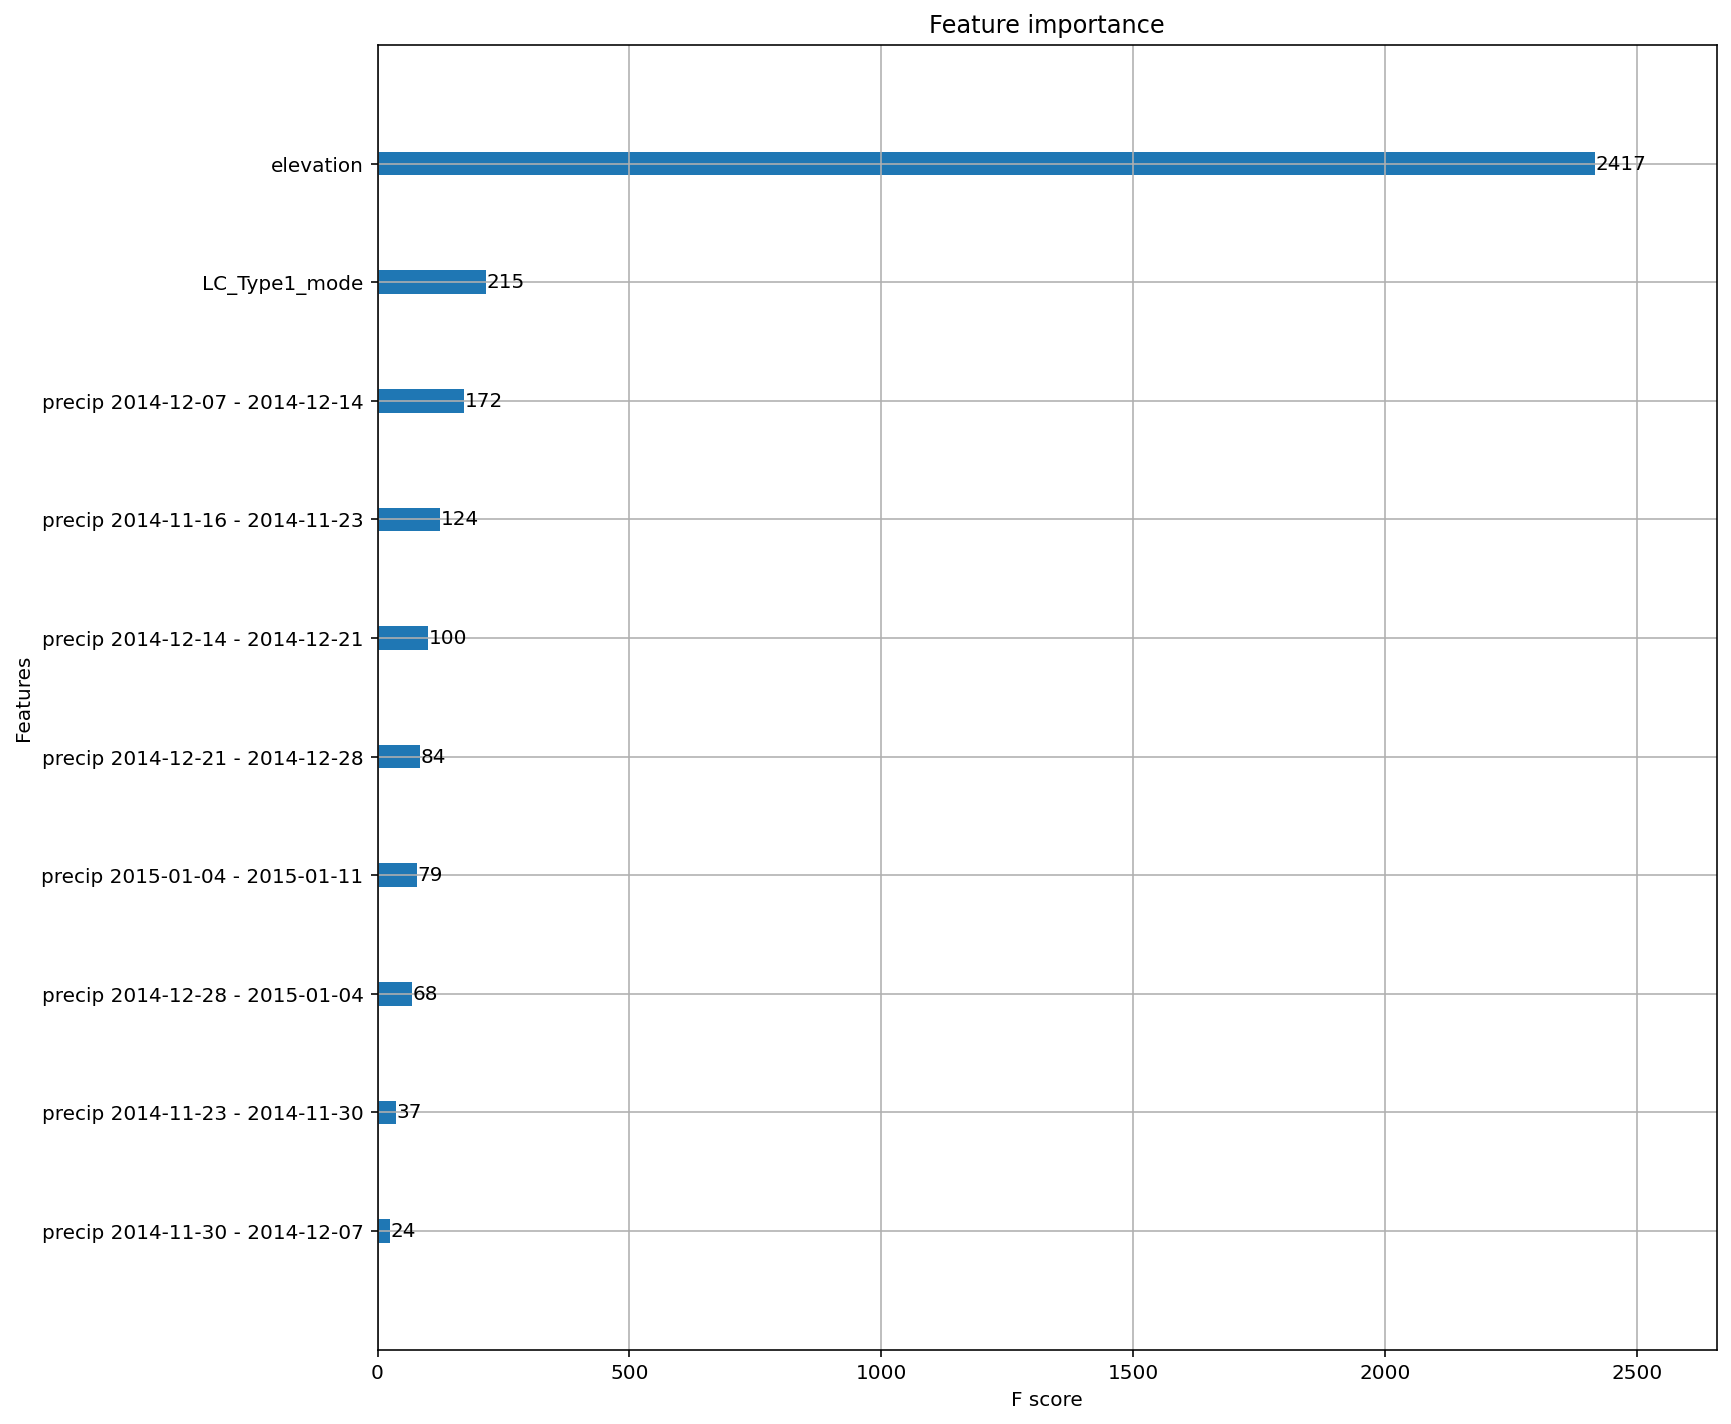

In [33]:
# Plot the most inportant features.
fig, ax = plt.subplots(figsize=(12, 12))
xgb.plot_importance(xgb_model, max_num_features=15, ax=ax)

As can be observed, Elevation seems to be the most important of all the features in determining if a piece of land is vulnerable to flooding in Southern Malawi, followed by land cover type. While percipitarion data has an even level of contribution to the prediction.

For this project, we will not be dropping any of the features since we can learn something from all of them.

## HyperParameter Optimization

Since our XGB model gave us the least RMSE value (0.13112555673348852), we will try to build a new XGB model with some hyper paramiter optimizations, to see if we can get a better performance. We will do the same for the Random forest regressor as well.

### New XGB Model

In [34]:
import xgboost as xgb

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

In [37]:
new_xgb_model = xgb.XGBRegressor(seed = 20, silent=True)

In [38]:
clf = GridSearchCV(estimator=new_xgb_model, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=0)

In [39]:
clf.fit(df_train_x, df_train_y)

GridSearchCV(estimator=XGBRegressor(seed=20, silent=True),
             param_grid={'colsample_bytree': [0.3, 0.7],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 6, 10],
                         'n_estimators': [100, 500, 1000]},
             scoring='neg_mean_squared_error')

In [40]:
print("Best parameters:", clf.best_params_)

Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}


In [41]:
dtrain = xgb.DMatrix(
    df_train_x, label=df_train_y
)

dtest = xgb.DMatrix(
    df_test_x, label=df_test_y
)


In [42]:
param = {
    'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, "objective": "reg:squarederror"
}
num_round = 100
xgb_model = xgb.train(param, dtrain, num_round)

In [43]:
preds = xgb_model.predict(dtest)

In [44]:
print("Rmse Score (Test data):", get_accuracy(df_test_y, preds))

Rmse Score (Test data): 0.12644131181987167


### New Random Forest Model

In [ ]:
df_train_x['LC_Type1_mode'] = pd.Categorical(df_train_x['LC_Type1_mode'])
df_test_x['LC_Type1_mode'] = pd.Categorical(df_test_x['LC_Type1_mode'])

In [23]:
df_test_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4940 entries, 2869 to 5286
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   elevation                       4940 non-null   float64 
 1   precip 2014-11-16 - 2014-11-23  4940 non-null   float64 
 2   precip 2014-11-23 - 2014-11-30  4940 non-null   float64 
 3   precip 2014-11-30 - 2014-12-07  4940 non-null   float64 
 4   precip 2014-12-07 - 2014-12-14  4940 non-null   float64 
 5   precip 2014-12-14 - 2014-12-21  4940 non-null   float64 
 6   precip 2014-12-21 - 2014-12-28  4940 non-null   float64 
 7   precip 2014-12-28 - 2015-01-04  4940 non-null   float64 
 8   precip 2015-01-04 - 2015-01-11  4940 non-null   float64 
 9   LC_Type1_mode                   4940 non-null   category
dtypes: category(1), float64(9)
memory usage: 391.2 KB


In [48]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

# Source: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [49]:
regressor_model = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = regressor_model, param_distributions = random_grid, n_iter = 20, cv = 2, verbose=2, random_state=0, n_jobs = -1)
rf_random.fit(df_train_x, df_train_y)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=0, verbose=2)

In [50]:
# Extract the best params and best estimator
best_params = rf_random.best_params_
best_rf_model = rf_random.best_estimator_
pprint(best_params)

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 1200}


In [51]:
print("Rmse Score (Test data):", get_accuracy(df_test_y, best_rf_model.predict(df_test_x)))

Rmse Score (Test data): 0.12635948961271912


## Auto ML with autogluon

With Auto ml, we can test out a variety of models, ranging from neural networks, to gradient boosting tree based machine learning models. Apart from our optimized gradient booster and random forest, we want to explore other algorithms and see if we can get a better performing model.

In [1]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [26]:
df_train_x.columns

Index(['elevation', 'precip 2014-11-16 - 2014-11-23',
       'precip 2014-11-23 - 2014-11-30', 'precip 2014-11-30 - 2014-12-07',
       'precip 2014-12-07 - 2014-12-14', 'precip 2014-12-14 - 2014-12-21',
       'precip 2014-12-21 - 2014-12-28', 'precip 2014-12-28 - 2015-01-04',
       'precip 2015-01-04 - 2015-01-11', 'LC_Type1_mode'],
      dtype='object')

In [28]:
new_dataframe = df_train_x.copy()
new_dataframe.head()

,elevation,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,precip 2014-12-28 - 2015-01-04,precip 2015-01-04 - 2015-01-11,LC_Type1_mode
6609,882.798962,0.0,0.0,0.0,10.887235,9.924515,7.701763,31.304699,19.829040,12
10759,189.692522,0.0,0.0,0.0,7.941822,7.465641,18.237181,12.623649,34.939908,9
4304,96.707596,0.0,0.0,0.0,9.235926,8.631158,12.670775,14.542067,23.483879,12
10652,605.387087,0.0,0.0,0.0,8.410152,8.945134,7.460990,18.300304,23.776055,9
11502,797.742201,0.0,0.0,0.0,6.327859,4.614671,5.219755,28.268342,26.430867,12


In [29]:
new_dataframe["target"] = df_train_y['target_2015'].values

In [30]:
predictor = TabularPredictor(label="target", problem_type="regression", eval_metric="r2").fit(
    train_data=new_dataframe, presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20211205_125158/"
Presets specified: ['best_quality']
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20211205_125158/"
AutoGluon Version:  0.3.1
Train Data Rows:    11526
Train Data Columns: 10
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12691.8 MB
	Train Data (Original)  Memory Usage: 0.84 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting CategoryFeatureGenerator...
NumExpr defaulting to 2 threads.
			Fitting CategoryMemoryMinimizeFeatureGenerator...
	Stage 4 Generators:
		Fitting Dr

In [31]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val     fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3   0.752086       7.635940  1729.202579                0.000829           0.440319            3       True         22
1     ExtraTreesMSE_BAG_L2   0.747792       4.708229   808.670732                0.451998           4.654461            2       True         17
2          CatBoost_BAG_L2   0.742056       4.312192   856.620199                0.055961          52.603928            2       True         16
3   RandomForestMSE_BAG_L2   0.737669       4.726034   835.025515                0.469804          31.009243            2       True         15
4           XGBoost_BAG_L2   0.732018       4.390267   830.538096                0.134037          26.521825            2       True         19
5      WeightedEnsemble_L2   0.730783       1.209481   217.253628         

{'leaderboard':                      model  score_val  ...  can_infer  fit_order
 0      WeightedEnsemble_L3   0.752086  ...       True         22
 1     ExtraTreesMSE_BAG_L2   0.747792  ...       True         17
 2          CatBoost_BAG_L2   0.742056  ...       True         16
 3   RandomForestMSE_BAG_L2   0.737669  ...       True         15
 4           XGBoost_BAG_L2   0.732018  ...       True         19
 5      WeightedEnsemble_L2   0.730783  ...       True         12
 6   NeuralNetFastAI_BAG_L2   0.730715  ...       True         18
 7          LightGBM_BAG_L2   0.729262  ...       True         14
 8          CatBoost_BAG_L1   0.722345  ...       True          6
 9           XGBoost_BAG_L1   0.722323  ...       True          9
 10       LightGBMXT_BAG_L2   0.720511  ...       True         13
 11    LightGBMLarge_BAG_L2   0.716637  ...       True         21
 12    LightGBMLarge_BAG_L1   0.704311  ...       True         11
 13         LightGBM_BAG_L1   0.701480  ...       True       

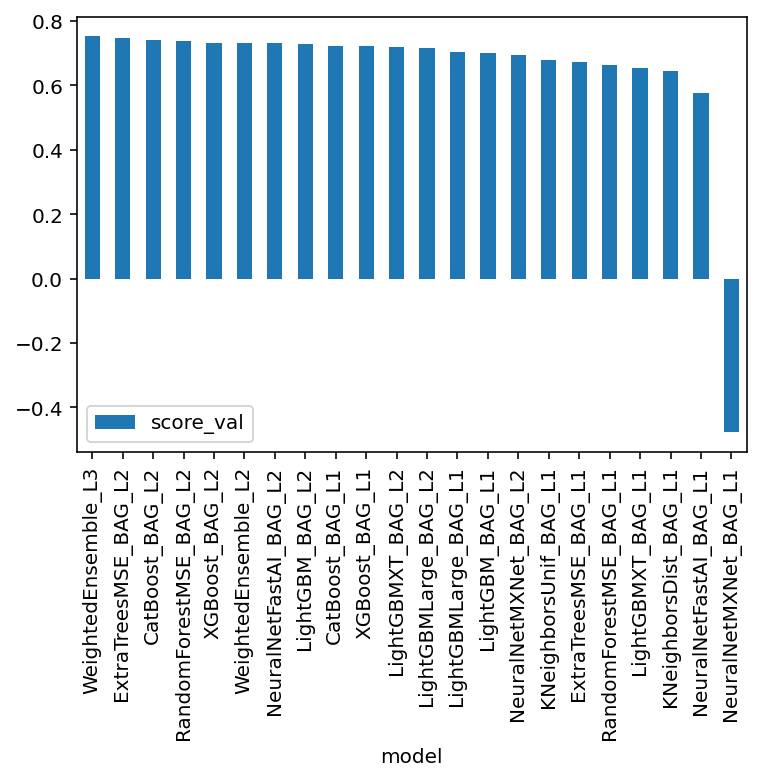

In [32]:
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [33]:
print("Rmse Score (Test data):", get_accuracy(df_test_y, predictor.predict(df_test_x)))

Rmse Score (Test data): 0.12687069702997616


From this, we are able to see that the best perfoming model is the Weighted ensemble model however we have been able to get a better performance with the optimized random forest model so we'll go with that. 

## Best Model

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
regressor_model = RandomForestRegressor(bootstrap= True, max_depth= None,
                                        max_features= 'sqrt',
                                        min_samples_leaf= 4,
                                        min_samples_split= 2,
                                        n_estimators= 1200
                                        ).fit(df_train_x, df_train_y)
print("Rmse Score (Test data):", get_accuracy(df_test_y, regressor_model.predict(df_test_x)))

/Users/oluwarotimiadesina/opt/anaconda3/envs/AI_ALU/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Rmse Score (Test data): 0.1259136994311335


## Generate 2019 Predictions

In [24]:
flood_2019_prediction = regressor_model.predict(test_dataframe)

In [25]:
flood_2019_prediction = pd.DataFrame(flood_2019_prediction)

In [26]:
flood_2019_prediction.columns = ["target_2019"]

In [27]:
flood_2019_prediction.to_csv("output_Random_Forest_Regressor.csv")

## Save Model

In [28]:
import joblib

joblib.dump(regressor_model, "./random_forest.joblib", compress=3)

['./random_forest.joblib']

## References

[1]"Zindi", Zindi, 2021. [Online]. Available: https://zindi.africa/. [Accessed: 29- Apr- 2021].